In [6]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import pywt

In [8]:
file_name = "New_N_001"
sample_rate, raw_signal = wavfile.read(f"..\datasets\raw\dataset_half\N\{file_name}.wav")
duration = raw_signal.shape[0] / sample_rate
print(f"Duration: {duration}s")

Duration: 2.104625s


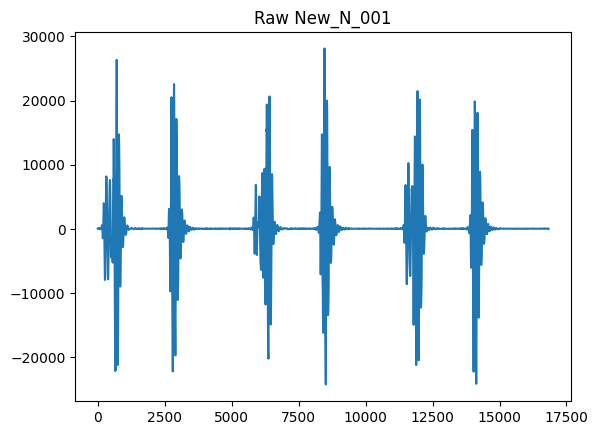

In [9]:
plt.title(f"Raw {file_name}")
fig = plt.plot(raw_signal)

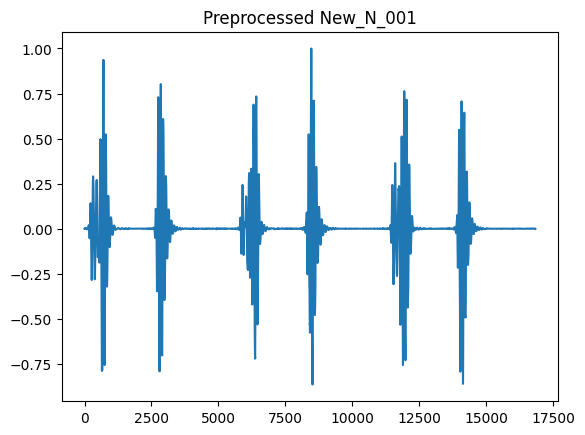

In [10]:
preprocessed_signal = raw_signal / np.max(np.abs(raw_signal))
plt.title(f"Preprocessed {file_name}")
fig = plt.plot(preprocessed_signal)

In [11]:
time = np.linspace(0, duration, preprocessed_signal.shape[0])
scales = np.geomspace(7, 600, 200)
cwt_mat, freq = pywt.cwt(preprocessed_signal, scales, 'morl', sampling_period=(1/sample_rate))
cwt_mat = np.abs(cwt_mat)

In [20]:
display(cwt_mat)

array([[3.26454348e-04, 3.59303259e-04, 2.44734009e-04, ...,
        1.61586501e-05, 8.11911752e-05, 1.43787886e-04],
       [3.77989576e-04, 3.62940464e-04, 1.99608559e-04, ...,
        1.16074350e-05, 9.64688082e-05, 1.51595815e-04],
       [4.12135849e-04, 3.34959045e-04, 1.18753885e-04, ...,
        4.15929218e-05, 1.27124089e-04, 1.56572260e-04],
       ...,
       [1.59428236e-01, 1.60564269e-01, 1.62123529e-01, ...,
        2.67513724e-04, 4.26680148e-04, 3.69593666e-04],
       [1.58638274e-01, 1.55417878e-01, 1.56171167e-01, ...,
        3.76739745e-04, 3.07319237e-04, 1.47919084e-04],
       [1.53144422e-01, 1.50967172e-01, 1.50246311e-01, ...,
        9.95977623e-05, 2.13176537e-04, 1.98786759e-04]])

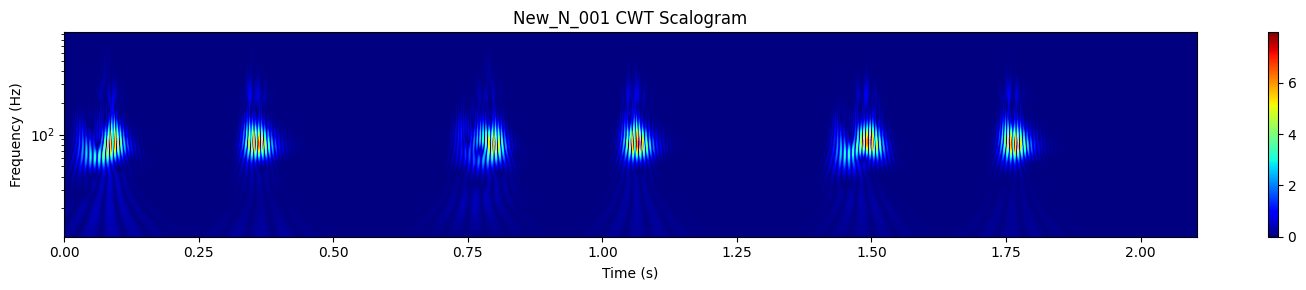

In [31]:
fig = plt.figure(figsize=(15, 3))
pcm = plt.pcolormesh(time, freq, cwt_mat)
plt.yscale("log")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title(f"{file_name} CWT Scalogram")
plt.colorbar()
plt.tight_layout()
plt.jet()
plt.savefig("fig.png")


In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.pcolormesh(time, freq, cwt_mat)
plt.yscale("log")
plt.axis(False)
plt.jet()
plt.tight_layout()
plt.savefig("cwt.png", transparent=False)